In [ ]:
# Loading in required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# This makes plots appear in the notebook
%matplotlib inline

# Import necessary packages
import yfinance as yf
from datetime import datetime, timedelta

In [ ]:
# Download historical data as a DataFrame
cmc = yf.download('CMC', start='2021-07-01', end='2023-07-31')
sp = yf.download('^GSPC', start='2021-07-01', end='2023-07-31')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


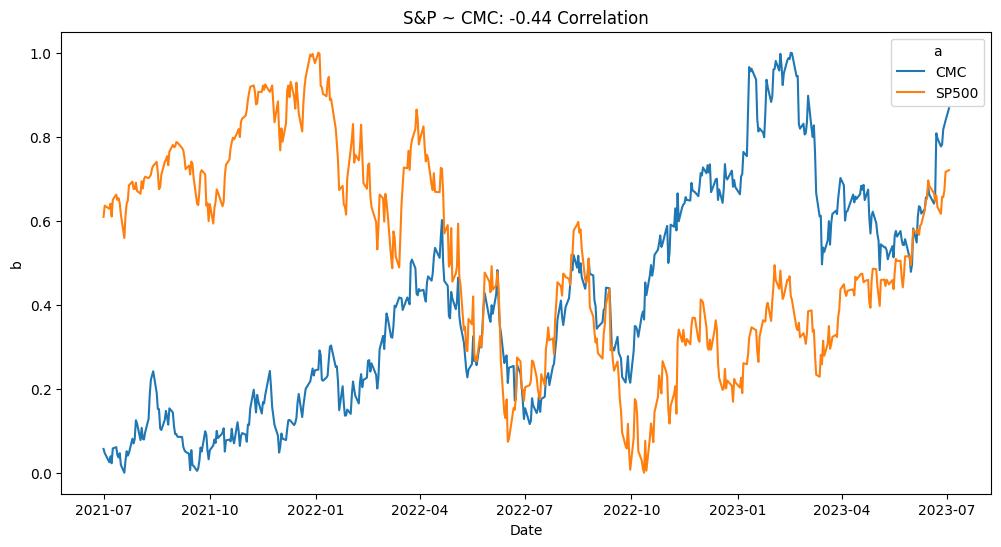

In [13]:
# Since we're dealing with different scales, we'll normalize the data
sp['Close'] = (sp['Close'] - sp['Close'].min()) / (sp['Close'].max() - sp['Close'].min())
cmc['Close'] = (cmc['Close'] - cmc['Close'].min()) / (cmc['Close'].max() - cmc['Close'].min())

# Preparing DataFrame for seaborn lineplot
data = pd.concat([cmc['Close'].rename('CMC'), sp['Close'].rename('SP500')], axis=1).reset_index()

# Melt the DataFrame to have the structure needed for lineplot
data_melt = data.melt('Date', var_name='a', value_name='b')

# print correlation between s&p vs btc
correlation = cmc['Close'].corr(sp['Close'])

# Plotting the data
plt.figure(figsize=(12, 6))
sns.lineplot(x="Date", y="b", hue='a', data=data_melt)
# Add the title
plt.title(f"S&P ~ CMC: {correlation:.2f} Correlation")  # using f-string to format the title with the correlation

plt.savefig('cmc_sp')

plt.show()